# Use OSMnx to create and analyze a NetworkX street network

OSMnx is a Python library that lets you download spatial geometries and construct, project, and visualize street networks from OpenStreetMap's API.

More about OSMnx: https://github.com/gboeing/osmnx

Install OSMnx: `conda install -c conda-forge osmnx`

In [1]:
import osmnx as ox, networkx as nx, pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)

## Calculate basic (and more advanced) street network metrics

In [2]:
# get the network for Piedmont, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place('Piedmont, California, USA', network_type='drive_service'))

In [3]:
stats

{'circuity_avg': 1.1101568145581493,
 'count_intersections': 324,
 'edge_density_km': None,
 'edge_length_avg': 118.4376013547462,
 'edge_length_total': 116779.47493577976,
 'intersection_density_km': None,
 'k_avg': 5.3732970027247955,
 'm': 986,
 'n': 367,
 'node_density_km': None,
 'self_loop_proportion': 0.006085192697768763,
 'street_density_km': None,
 'street_length_avg': 118.47308844091958,
 'street_length_total': 60658.221281750826,
 'street_segments_count': 512,
 'streets_per_node_avg': 2.904632152588556,
 'streets_per_node_counts': {0: 0, 1: 43, 2: 2, 3: 272, 4: 48, 5: 1, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.11716621253405994,
  2: 0.005449591280653951,
  3: 0.7411444141689373,
  4: 0.1307901907356948,
  5: 0.0027247956403269754,
  6: 0.0027247956403269754}}

In [4]:
stats['circuity_avg']

1.1101568145581493

To calculate density-based metrics, you must also pass the network's bounding area in square meters (otherwise `basic_stats()` will just skip them in the calculation):

In [5]:
# get the street network for a place, and its area in square meters (by projecting)
place = 'Piedmont, California, USA'
gdf = ox.gdf_from_place(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='drive_service')

In [6]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

avg_neighbor_degree                    {53107192: 2.6666666666666665, 53090322: 3.0, ...
avg_neighbor_degree_avg                                                          2.89668
avg_weighted_neighbor_degree           {53107192: 0.019179456801477934, 53090322: 0.0...
avg_weighted_neighbor_degree_avg                                               0.0328481
betweenness_centrality                 {53092207: 0.005202460905249439, 53107192: 0.0...
betweenness_centrality_avg                                                     0.0388068
center                                                                       [305541020]
circuity_avg                                                                     1.11016
closeness_centrality                   {53092207: 0.000522047192008307, 53107192: 0.0...
closeness_centrality_avg                                                     0.000593005
clustering_coefficient                 {53107192: 0.0, 53090322: 0.0, 53082627: 0.333...
clustering_coefficien

Notice that this returns the basic stats as a dict, which we threw into a pandas series. Degree counts and proportions are nested dicts inside it. To convert these stats to a pandas dataframe (to compare/analyze multiple networks against each other), just unpack these nested dicts first:

In [7]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats['streets_per_node_counts'].items():
    stats['int_{}_count'.format(k)] = count
for k, proportion in stats['streets_per_node_proportion'].items():
    stats['int_{}_prop'.format(k)] = proportion

# delete the no longer needed dict elements
del stats['streets_per_node_counts']
del stats['streets_per_node_proportion']

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats)).T

,circuity_avg,count_intersections,edge_density_km,edge_length_avg,edge_length_total,int_0_count,int_0_prop,int_1_count,int_1_prop,int_2_count,...,k_avg,m,n,node_density_km,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg
0,1.110157,324.0,26867.64835,118.437601,116779.474936,0.0,0.0,43.0,0.117166,2.0,...,5.373297,986.0,367.0,84.436301,0.006085,13955.738025,118.473088,60658.221282,512.0,2.904632


In [8]:
# proportion of intersections that are cul-de-sacs, T-intersections, and X-intersections?
print(stats['int_1_prop'])
print(stats['int_3_prop'])
print(stats['int_4_prop'])

0.11716621253405994
0.7411444141689373
0.1307901907356948


In [9]:
# how many streets emanate from each intersection?
G.graph['streets_per_node']

{53017091: 3,
 53018397: 3,
 53018399: 3,
 53018402: 3,
 53018404: 3,
 53018410: 3,
 53018411: 3,
 53021742: 4,
 53021743: 3,
 53021750: 3,
 53022623: 3,
 53022625: 1,
 53023513: 3,
 53025057: 3,
 53025060: 3,
 53025220: 3,
 53025222: 1,
 53027454: 3,
 53027455: 3,
 53027457: 4,
 53027459: 3,
 53027461: 3,
 53027463: 3,
 53028190: 3,
 53028192: 4,
 53033660: 4,
 53035699: 4,
 53036557: 3,
 53036558: 6,
 53037306: 3,
 53037307: 3,
 53040495: 4,
 53040794: 3,
 53041432: 3,
 53041437: 3,
 53041440: 3,
 53041442: 4,
 53041443: 4,
 53041445: 3,
 53041668: 3,
 53041670: 1,
 53042706: 3,
 53042707: 3,
 53044573: 1,
 53044575: 3,
 53044661: 3,
 53044664: 3,
 53046249: 3,
 53046250: 3,
 53046251: 3,
 53046252: 3,
 53046253: 3,
 53046254: 3,
 53046255: 4,
 53050874: 3,
 53050875: 3,
 53057697: 4,
 53057704: 3,
 53059166: 3,
 53059173: 4,
 53059175: 3,
 53059186: 3,
 53059187: 3,
 53059189: 3,
 53059885: 3,
 53060462: 3,
 53060465: 3,
 53060466: 4,
 53060467: 3,
 53060468: 4,
 53060469: 4,
 53060

## What's inside a NetworkX graph?

In [10]:
# nodes
list(G.nodes(data=True))[0:2]

[(53092207, {'osmid': 53092207, 'x': -122.2264515, 'y': 37.8155155}),
 (53090322, {'osmid': 53090322, 'x': -122.2368032, 'y': 37.8204243})]

In [11]:
# edges
list(G.edges(keys=True, data=True))[0:2]

[(53092207,
  53092210,
  0,
  {'geometry': <shapely.geometry.linestring.LineString at 0x232183814e0>,
   'highway': 'residential',
   'length': 142.95143879632437,
   'name': 'La Salle Avenue',
   'oneway': False,
   'osmid': 6353636}),
 (53092207,
  53050874,
  0,
  {'highway': 'residential',
   'length': 184.8626715345085,
   'name': 'Muir Avenue',
   'oneway': False,
   'osmid': 6367509})]

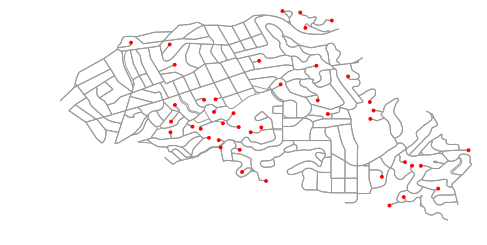

In [12]:
# highlight all the cul-de-sacs
nc = ['r' if G.graph['streets_per_node'][node]==1 else 'none' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=2, fig_height=4)

## Calculate the network path from the centermost node to some other node
Let the origin node be the node nearest the location and let the destination node just be the last node in the network. Then find the shortest path between origin and destination, using weight='length' to find the shortest spatial path (otherwise it treats each edge as weight=1).

In [13]:
# define a lat-long point, create network around point, define origin/destination nodes
location_point = (37.791427, -122.410018)
G = ox.graph_from_point(location_point, distance=500, distance_type='network', network_type='walk')
origin_node = ox.get_nearest_node(G, location_point)
destination_node = G.nodes()[-1]

In [14]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
route

[65326733, 65326736, 65332818, 65332815, 65319944, 65290756, 65290750]

In [15]:
# inspect the first node in the route
G.node[route[0]]

{'osmid': 65326733, 'x': -122.4107711, 'y': 37.7915424}

http://www.openstreetmap.org/node/65326733

In [16]:
# inspect the first edge in the route
G.edge[route[0]][route[1]]

{0: {'geometry': <shapely.geometry.linestring.LineString at 0x2321982b7b8>,
  'highway': 'residential',
  'length': 74.15163586589111,
  'name': 'Mason Street',
  'oneway': False,
  'osmid': 27166466}}

http://www.openstreetmap.org/way/27166466

In [17]:
# what is the first edge's length
G.edge[route[0]][route[1]][0]['length']

74.15163586589111

In [18]:
# what is the total length of the route?
nx.shortest_path_length(G, origin_node, destination_node, weight='length')

443.13354620656

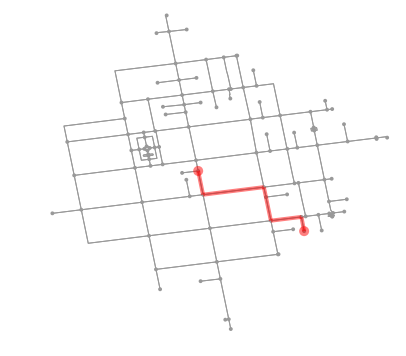

In [19]:
# plot it
fig, ax = ox.plot_graph_route(G, route)

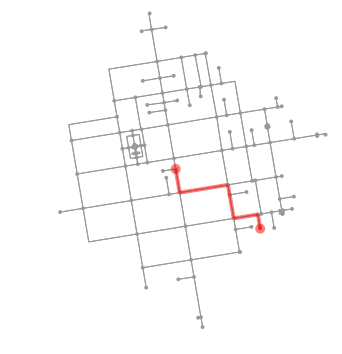

In [20]:
# project the network to UTM (zone calculated automatically) then plot the network/route again
G_proj = ox.project_graph(G)
fig, ax = ox.plot_graph_route(G_proj, route)

## Plot network path from one lat-long to another

In [21]:
# define origin/desination points then get the nodes nearest to each
origin_point = (37.792896, -122.412325)
destination_point = (37.790495, -122.408353)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

(850803362, 65290756)

In [22]:
# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

'[850803362, 633686735, 633686762, 633686748, 633686743, 850803353, 65295320, 65295314, 65295311, 65332818, 65332815, 65319944, 65290756]'

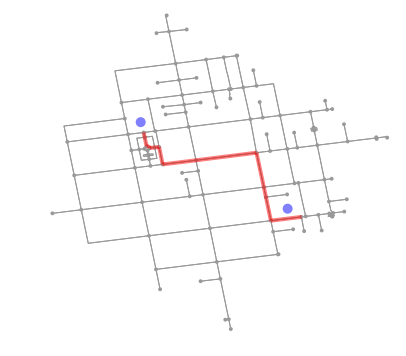

In [23]:
# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

## Demonstrate routing with one-way streets

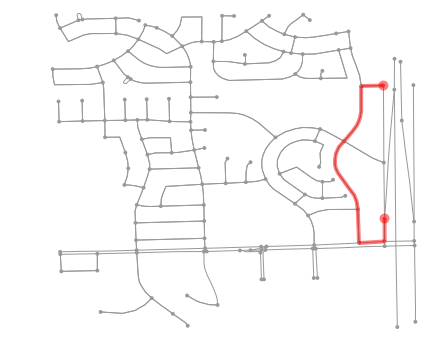

In [24]:
G = ox.graph_from_address('N Sicily Pl, Chandler, Arizona', distance=800, network_type='drive')
origin = (33.307792, -111.894940)
destination = (33.312994, -111.894998)
origin_node = ox.get_nearest_node(G, origin)
destination_node = ox.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route, save=True, filename='route')

#### Also, when there are parallel edges between nodes in the route, OSMnx picks the shortest edge to plot

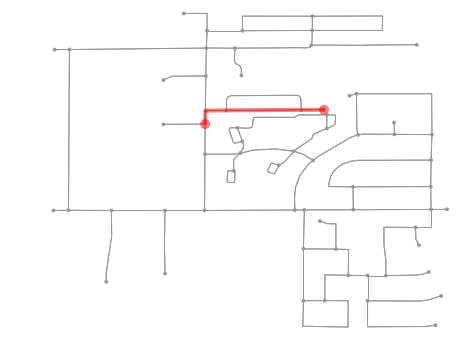

In [25]:
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, distance=500, clean_periphery=False)
origin = (33.301821, -111.829871)
destination = (33.301402, -111.833108)
origin_node = ox.get_nearest_node(G, origin)
destination_node = ox.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route)